# Example of using max-flow/min-cut algorithm for gender labeling problem

The code provided in connection with the section 5.3 (Graph cuts for optimizing MRF) of the lecture notes.

For solving max-flow/mic-cut we use `maxflow` package, see [https://pmneila.github.io/PyMaxflow/](https://pmneila.github.io/PyMaxflow/).

The example below is set-up exactly as in the lecture notes. You are adwised to experiment by changing the set up. In particular, try increasing the number of data points, for example as use the following for data term.
```
d = np.random.randint(low=145, high=201, size=50, dtype=int)
d += (5*np.sin(np.linspace(0, 4*np.pi, len(d)))).astype(int)

```

Also experiment with changing the value of `beta`. Setting `beta=0` corresponds to max-likelihood solution. Choosing larger `beta` should yield incresingly smooth solution.


In [1]:
import maxflow
import numpy as np
import matplotlib.pyplot as plt

## Setting up the problem

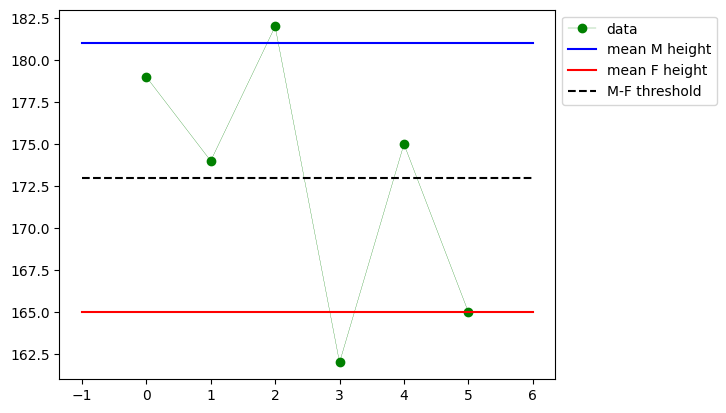

In [2]:
d = np.array([179, 174, 182, 162, 175, 165]) # heights (data term)

mu = [181, 165] # means of two classes, used for computation of likelihood
w_s = (d - mu[0]) ** 2 # source weight
w_t = (d - mu[1]) ** 2 # sink weights

fig, ax = plt.subplots()
ax.plot(d, '-og', lw=0.2, label='data')
ax.plot([-1, len(d)], [mu[0]]*2, 'b', label='mean M height')
ax.plot([-1, len(d)], [mu[1]]*2, 'r', label='mean F height')
ax.plot([-1, len(d)], [0.5*(mu[0] + mu[1])]*2, '--k', label='M-F threshold')
ax.legend(bbox_to_anchor = (1, 1))
plt.show()

## Solving the assignment problem using graph-cut

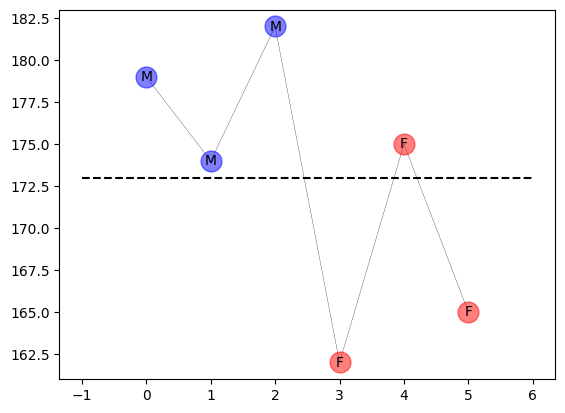

In [11]:

beta = 100  # try changing between 0 and 1000

# Create a graph with integer capacities.
g = maxflow.Graph[int]()

# Add (non-terminal) nodes and retrieve an index for each node.
nodes = g.add_nodes(len(d))

# Create edges between nodes.
for i in range(len(d)-1):
    g.add_edge(nodes[i], nodes[i+1], beta, beta)

# Set the capacities of the terminal edges.
for i in range(len(d)):
    g.add_tedge(nodes[i], (d[i] - mu[1]) ** 2, (d[i] - mu[0]) ** 2)

# Run the max flow algorithm.
flow = g.maxflow()

# Get the result as integer labels.
labeling = [g.get_segment(n) for n in nodes]

# Visualize
fig, ax = plt.subplots()
ax.plot([-1, len(d)], [0.5*(mu[0] + mu[1])]*2, '--k')
ax.plot(d, '-k', lw=0.2)
for i, di in enumerate(d):
    color = 'b' if labeling[i] == 0 else 'r'
    letter = 'M' if labeling[i] == 0 else 'F'
    ax.plot(i, di, 'o', color=color, alpha=0.5, markersize=15)
    ax.text(i, di, letter, ha='center', va='center')
plt.show()